##The Task

###Description

The task is to explore and prepare data and build classical ML models. Ideally, the models' hyperparameters would be optimised and evaluated quantitativeley and qualitatively from several aspects.

![Picture1.png](https://drive.google.com/uc?export=download&id=1iwZoGM87jMrkI6cSkOr6G7aD3ZheNZUk)

###About the dataset

The **SmartWatch Gestures Dataset** has been collected to evaluate several gesture recognition algorithms for interacting with mobile applications using arm gestures.

Eight different users performed twenty repetitions of twenty different gestures, for a total of 3200 sequences. Each sequence contains acceleration data from the 3-axis accelerometer of a first generation Sony SmartWatch™, as well as timestamps from the different clock sources available on an Android device. The smartwatch was worn on the user's right wrist. The gestures have been manually segmented by the users performing them by tapping the smartwatch screen at the beginning and at the end of every repetition.

Each row corresponds to one attempt of a particular gesture by a participant.
The rows contain information about:
- The identity of the participant
- The gesture type of the 20 possible gestures (see image)
- The attempt # by the participant of the gesture
- The span of the “features/time_nanos” over the steps.

The rows contain a description of each step recorded by the smartwatch for:
- `features/accel_x`, `features/accel_y`, `features/accel_z`: acceleration values over the three spatial axes
- `features/time_event`, `features/time_millis`, `features/time_nanos`: time-related values

##Data Preparation

###Loading the Dataset

First we start with loading the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt



upload the .csv file

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1jyqeonDqjWL-H9LhmwlQyuWpq8ggisR2" -O smartwatch_gestures.csv


--2024-04-09 03:38:35--  https://drive.google.com/uc?export=download&id=1jyqeonDqjWL-H9LhmwlQyuWpq8ggisR2
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.139, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jyqeonDqjWL-H9LhmwlQyuWpq8ggisR2&export=download [following]
--2024-04-09 03:38:35--  https://drive.usercontent.google.com/download?id=1jyqeonDqjWL-H9LhmwlQyuWpq8ggisR2&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7444690 (7.1M) [application/octet-stream]
Saving to: ‘smartwatch_gestures.csv’

smartwatch_gestures 100%[===================>]   7.10M  29.7M

read the csv file

In [ ]:
# Load the dataset
df = pd.read_csv("/content/smartwatch_gestures.csv")

<ipython-input-39-3dc34259b5c1>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

Display the first few rows to understand the structure.

In [ ]:
df.head()

,info,info.1,info.2,info.3,step01,step01.1,step01.2,step01.3,step01.4,step01.5,...,step50.2,step50.3,step50.4,step50.5,step51,step51.1,step51.2,step51.3,step51.4,step51.5
0,gesture,participant,attempt,nano_span,features/accel_x,features/accel_y,features/accel_z,features/time_event,features/time_millis,features/time_nanos,...,features/accel_z,features/time_event,features/time_millis,features/time_nanos,features/accel_x,features/accel_y,features/accel_z,features/time_event,features/time_millis,features/time_nanos
1,3,4,5,1099334717,-0.153229,0.459687,10.266337,428417000000.0,1384350600000.0,141699000000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,4,7,1646362304,3.217807,0.612916,9.346964,764273000000.0,1384510100000.0,35549205000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19,3,8,2299163819,8.274362,0.0,6.282385,6308546000000.0,1384269200000.0,116132694000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,8,8,1340087890,-8.42759,-0.919373,5.363012,2042136000000.0,1387383200000.0,599449100000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Inspect the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Columns: 310 entries, info to step51.5
dtypes: object(310)
memory usage: 7.7+ MB


The output is like a quick snapshot of a big table made with Pandas. The table has 3,251 rows and 310 columns. Every piece of information in the table is stored as text or a mix of numbers and text, and the whole thing takes up just under 8 megabytes on the computer.

Before proceeding with data analysis or modeling, we need to clean and preprocess the data, including converting strings to numbers where applicable and handling missing values.

###Data Cleaning

The first row after the header seems to contain meta descriptions for the columns, so we should adjust the dataframe to use this row for column names and then drop it from the data.

In [ ]:
# Load the dataset without using the first row as headers
file_path = "/content/smartwatch_gestures.csv"
df = pd.read_csv(file_path, header=None)

# Combine the original header row with the first row of data to create new column names
new_headers = [f"{header}_{additional_info}" if additional_info else f"{header}"
               for header, additional_info in zip(df.iloc[0], df.iloc[1])]

# Assign these new column names to the DataFrame
df.columns = new_headers

# Drop the first two rows (original header and the row used for merging) and reset index
df = df.drop([0, 1]).reset_index(drop=True)

# Display the first few rows to confirm the changes
df.head()

<ipython-input-42-8d75f84630b9>:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

,info_gesture,info_participant,info_attempt,info_nano_span,step01_features/accel_x,step01_features/accel_y,step01_features/accel_z,step01_features/time_event,step01_features/time_millis,step01_features/time_nanos,...,step50_features/accel_z,step50_features/time_event,step50_features/time_millis,step50_features/time_nanos,step51_features/accel_x,step51_features/accel_y,step51_features/accel_z,step51_features/time_event,step51_features/time_millis,step51_features/time_nanos
0,3,4,5,1099334717,-0.153229,0.459687,10.266337,428417000000.0,1384350600000.0,141699000000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,4,7,1646362304,3.217807,0.612916,9.346964,764273000000.0,1384510100000.0,35549205000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,3,8,2299163819,8.274362,0.0,6.282385,6308546000000.0,1384269200000.0,116132694000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,8,8,1340087890,-8.42759,-0.919373,5.363012,2042136000000.0,1387383200000.0,599449100000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,7,10,2091003418,-2.604892,3.064578,9.040505,3529643000000.0,1387384800000.0,601102000000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Load the dataset without using the first row as headers
file_path = "/content/smartwatch_gestures.csv"
df = pd.read_csv(file_path, header=None)

# Combine the original header row with the first row of data to create new column names
df.columns = [f"{h}_{d}" if d else f"{h}" for h, d in zip(df.iloc[0], df.iloc[1])]

# Drop the first two rows (original header and the row used for merging) and reset index
df.drop(index=[0, 1], inplace=True)
df.reset_index(drop=True, inplace=True)

# Display the first few rows to confirm the changes
df.head()

<ipython-input-43-482b02ad1a9c>:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

,info_gesture,info_participant,info_attempt,info_nano_span,step01_features/accel_x,step01_features/accel_y,step01_features/accel_z,step01_features/time_event,step01_features/time_millis,step01_features/time_nanos,...,step50_features/accel_z,step50_features/time_event,step50_features/time_millis,step50_features/time_nanos,step51_features/accel_x,step51_features/accel_y,step51_features/accel_z,step51_features/time_event,step51_features/time_millis,step51_features/time_nanos
0,3,4,5,1099334717,-0.153229,0.459687,10.266337,428417000000.0,1384350600000.0,141699000000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,4,7,1646362304,3.217807,0.612916,9.346964,764273000000.0,1384510100000.0,35549205000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,3,8,2299163819,8.274362,0.0,6.282385,6308546000000.0,1384269200000.0,116132694000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,8,8,1340087890,-8.42759,-0.919373,5.363012,2042136000000.0,1387383200000.0,599449100000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,7,10,2091003418,-2.604892,3.064578,9.040505,3529643000000.0,1387384800000.0,601102000000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As I am getting a DtypeWarning after running df.head(), I decided to investigate further. Pandas detected that these listed columns contain a mix of different data types. Columns ideally should contain data of a single type for proper handling. When a column has both strings and numbers, Pandas assigns it a general object dtype, which can limit certain operations and analyses.

I decided to inspect the columns by checking the contents to understand why mixed types are present.

In [ ]:
# Iterate over each object column in the DataFrame
for column in df.columns:
    # Use a set comprehension to find the unique data types in each column
    unique_types = {type(val) for val in df[column]}
    print(f"Column '{column}' contains these data types: {unique_types}")

Column 'info_gesture' contains these data types: {<class 'int'>, <class 'str'>}
Column 'info_participant' contains these data types: {<class 'int'>, <class 'str'>}
Column 'info_attempt' contains these data types: {<class 'int'>, <class 'str'>}
Column 'info_nano_span' contains these data types: {<class 'int'>, <class 'str'>}
Column 'step01_features/accel_x' contains these data types: {<class 'float'>, <class 'str'>}
Column 'step01_features/accel_y' contains these data types: {<class 'float'>, <class 'str'>}
Column 'step01_features/accel_z' contains these data types: {<class 'float'>, <class 'str'>}
Column 'step01_features/time_event' contains these data types: {<class 'float'>, <class 'str'>}
Column 'step01_features/time_millis' contains these data types: {<class 'float'>, <class 'str'>}
Column 'step01_features/time_nanos' contains these data types: {<class 'float'>, <class 'str'>}
Column 'step02_features/accel_x' contains these data types: {<class 'float'>, <class 'str'>}
Column 'step0

The dataset contains two main types of data across all columns: strings and floating-point numbers. This mix can occur due to:

1. **Mixed Data Entries:** Some entries may be numbers, while others are text. This could happen if numeric data includes additional characters or if entries are mistakenly input as text.

2. **Data Collection or Entry Errors:** Inconsistencies in data collection or entry methods, like typos or varying recording standards, can lead to mixed types.

3. **Special Values or Missing Data:** Special strings (e.g., "NA", "null") might represent missing or special cases in numerical columns.

**Implications:**

To use this data effectively:

- **Preprocessing:** we should standardize column formats by converting everything to a consistent data type, typically numerical for analysis or machine learning.

- **Handling Non-numeric Values:** decide how to handle non-numeric values.

As the `info_gesture`, `info_participant`, and `info_attempt` columns are identifier columns and the task involves creating a train-test split based on participants, these columns should be of string type.
I decided to convert all other data columns to Numeric Types.


In [ ]:
# Select the first three columns of the DataFrame
columns_to_convert = df.columns[:3]

# Iterate over each of these columns
for column in columns_to_convert:
    # Convert the current column to string type
    # This ensures that all data in the column is treated as text, preserving any leading zeros or special formatting.
    df[column] = df[column].astype(str)


In [ ]:
# Exclude the first three columns as these have already been converted.
columns_to_convert = df.columns[3:]

# Now, iterate over each column that we've identified for conversion.
for column in columns_to_convert:
    # Convert the current column to a numeric type.
    # The 'errors='coerce'' argument ensures that any value in the column
    # that cannot be directly converted to a number is instead replaced with NaN (Not a Number).
    # This approach handles cases where mixed data types exist in a column, ensuring the integrity
    # of numerical analyses later on.
    df[column] = pd.to_numeric(df[column], errors='coerce')



By excluding the first three columns and converting the remaining ones to numeric types, we ready the DataFrame for efficient and error-free numerical analysis. This process retains any essential textual or identifier information stored in the first three columns.

Next we check the results of our data type conversions:

In [ ]:
# Iterate over each object column in the DataFrame
for column in df.columns:
    # Use a set comprehension to find the unique data types in each column
    unique_types = {type(val) for val in df[column]}
    print(f"Column '{column}' contains these data types: {unique_types}")

Column 'info_gesture' contains these data types: {<class 'str'>}
Column 'info_participant' contains these data types: {<class 'str'>}
Column 'info_attempt' contains these data types: {<class 'str'>}
Column 'info_nano_span' contains these data types: {<class 'int'>}
Column 'step01_features/accel_x' contains these data types: {<class 'float'>}
Column 'step01_features/accel_y' contains these data types: {<class 'float'>}
Column 'step01_features/accel_z' contains these data types: {<class 'float'>}
Column 'step01_features/time_event' contains these data types: {<class 'float'>}
Column 'step01_features/time_millis' contains these data types: {<class 'float'>}
Column 'step01_features/time_nanos' contains these data types: {<class 'float'>}
Column 'step02_features/accel_x' contains these data types: {<class 'float'>}
Column 'step02_features/accel_y' contains these data types: {<class 'float'>}
Column 'step02_features/accel_z' contains these data types: {<class 'float'>}
Column 'step02_feature

In [ ]:
df.dtypes

info_gesture                    object
info_participant                object
info_attempt                    object
info_nano_span                   int64
step01_features/accel_x        float64
                                ...   
step51_features/accel_y        float64
step51_features/accel_z        float64
step51_features/time_event     float64
step51_features/time_millis    float64
step51_features/time_nanos     float64
Length: 310, dtype: object

The `dtype` output indicates that the data type conversion was successful. The DataFrame contains a mix of object (strings 'str'), integer (int64), and floating-point (float64) data types across its columns.

Columns `info_gesture`, `info_participant`, and `info_attempt` are of type object (string), containing identifiers or categorical data describing each observation.

Column `info_nano_span` is of type int64, indicating it contains integer values. Its name suggests it might relate to timing or duration, possibly representing the span or duration of something in nanoseconds. Being an integer, this column can be used for numerical operations.

Columns from `step01_features/accel_x` to `step51_features/time_nanos` are of type float64. The use of floating-point numbers allows for the representation of a wide range of decimal values, suitable for precise measurements.

This structured approach to data typing ensures that operations appropriate for each type of data can be applied correctly, preserving the integrity and usability of the dataset.

Next, we check for NaN values to determine if there are any NaN values in the DataFrame, especially in columns converted to float64. We use the `.isna()` method combined with `.any()` to check each column.

In [ ]:
# Check for any NaN values in each column
nan_columns = df.isna().any()

# Print columns that contain NaN values
print(nan_columns[nan_columns == True])

Series([], dtype: bool)


This means that no columns have NaN values. This output is a good sign when you're verifying the cleanliness of the data.

Next, we check for duplicate values in the DataFrame using the `duplicated()` method. This method returns a boolean series indicating whether each row is a duplicate of a previous row within the DataFrame.

In [ ]:
# Find duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


This analysis confirms that, based on the criteria applied by `df.duplicated()`, there are no rows in the DataFrame that are exact duplicates of another row across all columns.

The dataset does not have any rows that are entirely identical across all 310 columns. This implies that each row represents a distinct observation or record without any exact replication.

The lack of duplicate rows typically indicates good data quality.

###Creating a train-test split including validation set

Create a train-test split over the participants. The train test should contain data from 5 randomly selected participants, while the rest of the participants' (3) data should constitute the test set.

In [ ]:
# Get unique participants
participants = df['info_participant'].unique()

# Randomly select 5 participants for training and use the rest for testing
train_participants, test_participants = train_test_split(participants, test_size=3, train_size=5, random_state=42)

# Split the data based on the selected participants
train_data = df[df['info_participant'].isin(train_participants)]
test_data = df[df['info_participant'].isin(test_participants)]

# Randomly select 1 participant for validation
test_participants, val_participants = train_test_split(test_participants, test_size=1, random_state=42)

# Now split the test_data further into testing and validation sets
val_data = test_data[test_data['info_participant'].isin(val_participants)]
test_data = test_data[~test_data['info_participant'].isin(val_participants)]

# Verification steps:
# 1. Check there's no overlap in participants
assert set(train_participants).isdisjoint(set(test_participants)), "Participants overlap between train and test sets."

# 2. Verify the number of participants in each set
print(f"Training set participants: {train_participants}")
print(f"Testing set participants: {test_participants}")
print(f"Validation set participants: {val_participants}")

# 3. Inspect the distribution of data points per participant
print("\nDistribution in the training set:")
print(train_data['info_participant'].value_counts())

print("\nDistribution in the testing set:")
print(test_data['info_participant'].value_counts())

print("\nDistribution in the validation set:")
print(val_data['info_participant'].value_counts())

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

assert train_data.shape==(2020,310)
assert test_data.shape==(802,310)
assert val_data.shape==(429,310)

Training set participants: ['2' '8' '6' '7' '1']
Testing set participants: ['5' '4']
Validation set participants: ['3']

Distribution in the training set:
info_participant
2    417
8    401
6    401
1    401
7    400
Name: count, dtype: int64

Distribution in the testing set:
info_participant
5    402
4    400
Name: count, dtype: int64

Distribution in the validation set:
info_participant
3    429
Name: count, dtype: int64
(2020, 310)
(802, 310)
(429, 310)


The code includes several checks to ensure the correctness of the train-test split based on participants:

1. **Overlap Check**: The first assert statement verifies that there is no overlap of participants between the training and testing datasets. If an overlap exists, an error will be raised.

2. **Unique Participant Count**: After the overlap check, the code prints the count of unique participants in each dataset to verify that the expected numbers are obtained.

3. **Data Distribution Visualization**: Lastly, the code displays the distribution of data points for each participant within the training and testing datasets. This visualization allows for a visual inspection of whether the split appears logical based on the number of rows associated with each participant.

These checks collectively ensure that the train-test split based on participants was executed correctly.

**Analysis:**
The distributions in the training and testing sets seem appropriate. However, it's crucial to evaluate the model's performance specifically on participant '3' in the validation set. Since this participant is the sole representative in the validation set, their impact on the model's generalization ability is significant.


###Standardisation

Standardize (z-scale) the data in the following manner:

- Scale all "features/accel_..." variables using their overall mean and standard deviation (i.e., not feature-specific mean and standard deviation).
- Scale all "features/time_..." using their overall mean and standard deviation (i.e., not feature-specific mean and standard deviation).

In [ ]:
# Select all acceleration and time features
accel_features = [col for col in df.columns if 'features/accel' in col]
time_features = [col for col in df.columns if 'features/time' in col]

# Calculate overall mean and standard deviation for "features/accel_" columns
overall_accel_mean = df[accel_features].values.mean()
overall_accel_std = df[accel_features].values.std()
print(f"Acceleration Features - Mean: {overall_accel_mean}, Standard Deviation: {overall_accel_std}")

# Calculate overall mean and standard deviation for "features/time_" columns
overall_time_mean = df[time_features].values.mean()
overall_time_std = df[time_features].values.std()
print(f"Time Features - Mean: {overall_time_mean}, Standard Deviation: {overall_time_std}")

# Scale "features/accel_" using overall mean and standard deviation
scaler_accel = StandardScaler()
scaled_accel = scaler_accel.fit_transform(df[accel_features])

# Scale "features/time_" using overall mean and standard deviation
scaler_time = StandardScaler()
scaled_time = scaler_time.fit_transform(df[time_features])

# Replace original columns with scaled values in DataFrame
df[accel_features] = scaled_accel
df[time_features] = scaled_time

# Calculate scaled overall mean and standard deviation for "features/accel_" columns
scaled_accel_mean = df[accel_features].values.mean()
scaled_accel_std = df[accel_features].values.std()
print(f"Acceleration Features - Mean: {scaled_accel_mean}, Standard Deviation: {scaled_accel_std}")

# Calculate scaled overall mean and standard deviation for "features/time_" columns
scaled_time_mean = df[time_features].values.mean()
scaled_time_std = df[time_features].values.std()
print(f"Time Features - Mean: {scaled_time_mean}, Standard Deviation: {scaled_time_std}")

Acceleration Features - Mean: 1.2848718017804475, Standard Deviation: 4.23290963905606
Time Features - Mean: 29441066887184.027, Standard Deviation: 110073689650063.38
Acceleration Features - Mean: 5.928296277675076e-18, Standard Deviation: 1.0
Time Features - Mean: -4.993253961647365e-15, Standard Deviation: 1.0


Z-scaling the features makes their average value 0 and their spread 1. This doesn't change how the data looks, just how it's measured. It keeps the relationships between data points intact.

Seeing means close to 0 and standard deviations near 1 means the scaling worked. This makes the features more similar in terms of stats, which is good for many machine learning methods.

Overall, this helps algorithms work better by making sure all features are in the same range. It can make them learn faster and more accurately.

## Training and Modelling

Since the target variable is the "nano_span", and the input variables are all the "step..." variables, we need to extract these accordingly.

In [ ]:
# Extract input features for both training and testing sets (all columns that start with "step")
input_features_train = [col for col in train_data.columns if col.startswith('step')]
input_features_test = [col for col in test_data.columns if col.startswith('step')]
input_features_val = [col for col in val_data.columns if col.startswith('step')]

target_variable = 'info_nano_span'

# Define the input DataFrames for both training and testing sets using the input features
X_train = train_data[input_features_train]
X_test = test_data[input_features_test]
X_val = val_data[input_features_val]

# Define the target variable for both training and testing sets as nano_span
y_train = train_data[target_variable]
y_test = test_data[target_variable]
y_val = val_data[target_variable]

# Checking the shapes of X_train, y_train, X_test, and y_test to ensure they are aligned
print(f"Shape of Training Input Features (X_train): {X_train.shape}")
print(f"Shape of Training Target Variable (y_train): {y_train.shape}")
print(f"Shape of Testing Input Features (X_test): {X_test.shape}")
print(f"Shape of Testing Target Variable (y_test): {y_test.shape}")
print(f"Shape of Validation Input Features (X_test): {X_val.shape}")
print(f"Shape of Validation Target Variable (y_test): {y_val.shape}")

Shape of Training Input Features (X_train): (2020, 306)
Shape of Training Target Variable (y_train): (2020,)
Shape of Testing Input Features (X_test): (802, 306)
Shape of Testing Target Variable (y_test): (802,)
Shape of Validation Input Features (X_test): (429, 306)
Shape of Validation Target Variable (y_test): (429,)


The dataset is split into three parts: training, testing, and validation. The training set has 2020 samples with 306 features each. The testing set has 802 samples, also with 306 features. The validation set, used for evaluating models, has 429 samples. Overall, the dataset is well-prepared for analysis and modeling.

###Linear Regression Model

In [ ]:
# Define the pipeline
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("lr", LinearRegression())])

# Define the input DataFrames for training and validation
X_train = train_data[input_features_train]
y_train = train_data[target_variable]

X_valid = val_data[input_features_val]
y_valid = val_data[target_variable]

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict and evaluate the validation set
valid_predictions = pipe.predict(X_valid)
print("Validation MAE:", mean_absolute_error(y_valid, valid_predictions))

# Evaluate on the test set
X_test = test_data[input_features_test]
y_test = test_data[target_variable]
test_predictions = pipe.predict(X_test)

# Evaluation metrics
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f"Test MSE: {mse_test}, R2: {r2_test}")


Validation MAE: 2.510195140155327e+16
Test MSE: 7.353601966200379e+37, R2: -2.106560078111363e+20


**Model Performance Overview**

The Validation MAE (Mean Absolute Error) is the average difference between what the model predicts and the real values for the validation set.
A large value (`2.51 x 10^16`) means the model often guesses wrong by a lot.

The Test MSE (Mean Squared Error) is like MAE, but squares the differences; this makes bigger errors stand out more.
An enormous number (`7.35 x 10^37`) tells us the model's guesses are often way off.

R-squared (R2) shows how much of the change in the target variable the model can explain.
A negative number (`−2.106 x 10^20`) means our model does worse than just guessing the average every time.

These numbers suggest our model isn't doing well. It's missing the mark by a lot, and it needs some serious tweaking.


**Visualisation 1**

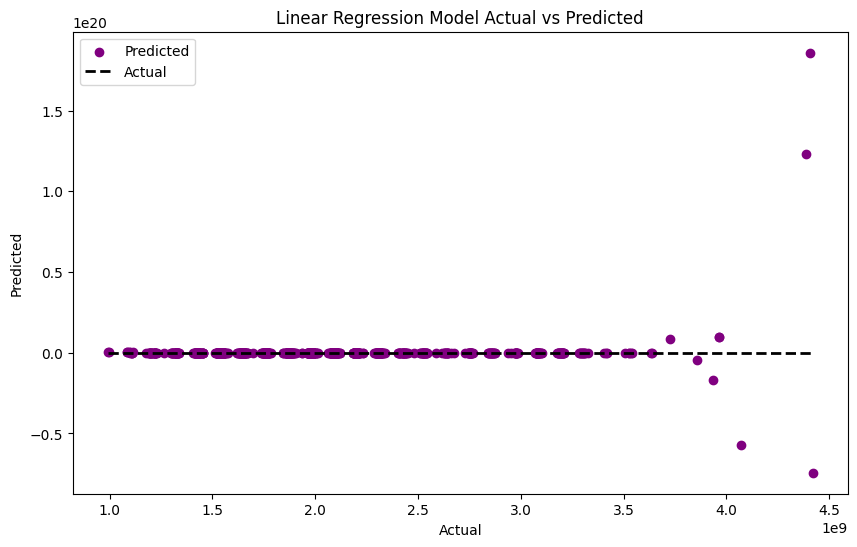

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='purple', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Model Actual vs Predicted')
plt.legend()
plt.show()

**Observations from the Plot**
- Many predicted values are close to zero. When actual values change a lot, the model still guesses numbers near zero.
- There's a dashed line where predicted equals actual. In a perfect world, all points would be on this line.
- Some predictions are way too high, suggesting the model struggles with unusual data.
- Actual values reach up to `4e9`, but predictions don't span this range. It might be because:
  - The model is too simple.
  - We need better features.
  - The model isn't learning well enough from the training data.

**Conclusion**
The model's narrow range of predictions points to a need for deeper analysis and potentially revising the model or data processing steps.

**Visualisation 2**

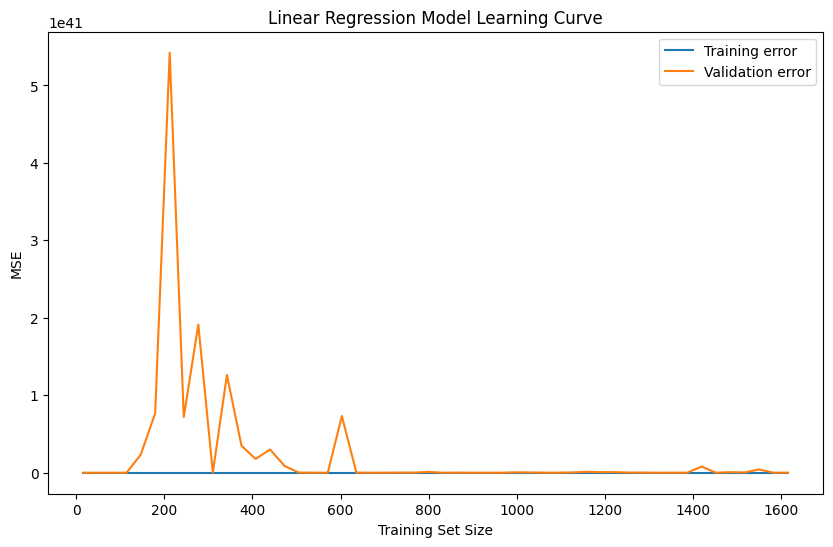

In [ ]:
# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    pipe, X_train, y_train, cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate the mean and standard deviation of the training and validation scores at each training set size
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Linear Regression Model Learning Curve')
plt.legend()
plt.show()


The Training Error stays about the same no matter how much data we use. This means our model is consistently learning from the training data.
The Validation Error gets better (goes down) as we add more data. This is good; it means our model is getting smarter and can apply what it learns to new data.
Both Errors Are High which indicates that our model isn't predicting well.

Why It Might Be Happening:
- The data might not be prepared correctly (like we didn't scale the numbers down to a similar range).
- There could be some extreme outlier values throwing the model off.
- Maybe the model we're using is too simple to catch the patterns in our data.

Next, I am going to apply Principal Component Analysis to reduce the dimensionality of the data and see if that improves the Linear Regression Model.

###Linear Regression Model with PCA

In [ ]:
# Define the pipeline with PCA and Linear Regression
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),  # Standardize the data
    ("pca", PCA(n_components=0.95)),  # Apply PCA to retain 95% of variance
    ("lr", LinearRegression())  # Linear Regression model
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict and evaluate on validation
valid_predictions = pipe.predict(X_valid)
print("Validation MAE:", mean_absolute_error(y_valid, valid_predictions))

# Evaluate on the test set
test_predictions = pipe.predict(X_test)

# Evaluation metrics
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f"Test MSE: {mse_test}, R2: {r2_test}")

Validation MAE: 136716130.05946717
Test MSE: 6.457374818194005e+16, R2: 0.8150178910426161


The model's Mean Absolute Error (MAE) on the validation set is quite high, around 136.7 million, indicating that the model's predictions often miss the mark by a significant margin. Meanwhile, the Mean Squared Error (MSE) is particularly high, which might be due to the presence of outliers; this metric tends to amplify larger errors because it squares them before averaging. The R² score on the test set is about 0.815, showing the model can predict approximately 81.5% of the variance in our target variable from the features. However, the mix of a high R² with high MAE and MSE values presents a puzzle. It could mean issues with how we're scaling our data, outliers affecting our MSE more than our R², or that our model is mostly accurate but makes a few very large errors. This situation hints at potential overfitting or underfitting and suggests that while our model understands a good part of the variance, there's room for improvement, especially in handling prediction errors.

**Visualisation 1**

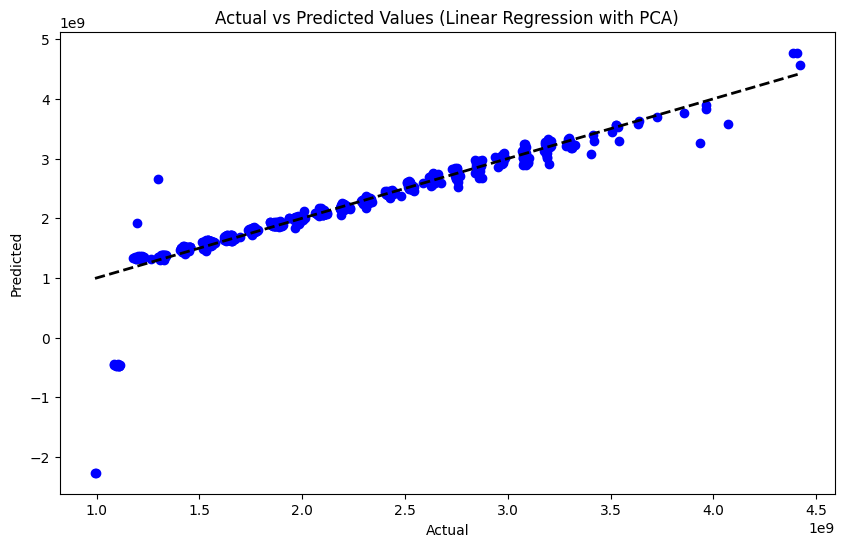

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Linear Regression with PCA)')
plt.show()

The scatter plot shows a mostly linear relationship between the actual and predicted values, hinting that our model does a good job of catching the data's trend. Most points line up near the diagonal dashed line, which is what we'd see if predictions were perfect.

However, not all is perfect. A few points stray far from this line, indicating predictions that miss the mark by a lot. Particularly, some points fall below the diagonal, showing predictions lower than actual values, including one that's even negative.

- Some predictions overshoot the actual values (points above the diagonal).
- Others predict values that are too low (points below the diagonal).

Despite these issues, the cluster of points near the diagonal tells us the model generally predicts well. But, those outlier predictions could be skewing our error metrics like MAE and MSE, making them appear worse.

Overall, while the model gets the big picture right, it trips up on specific cases. It would be wise to look more into these outliers and see if adjustments to the model could make it even better.

**Visualisation 2**

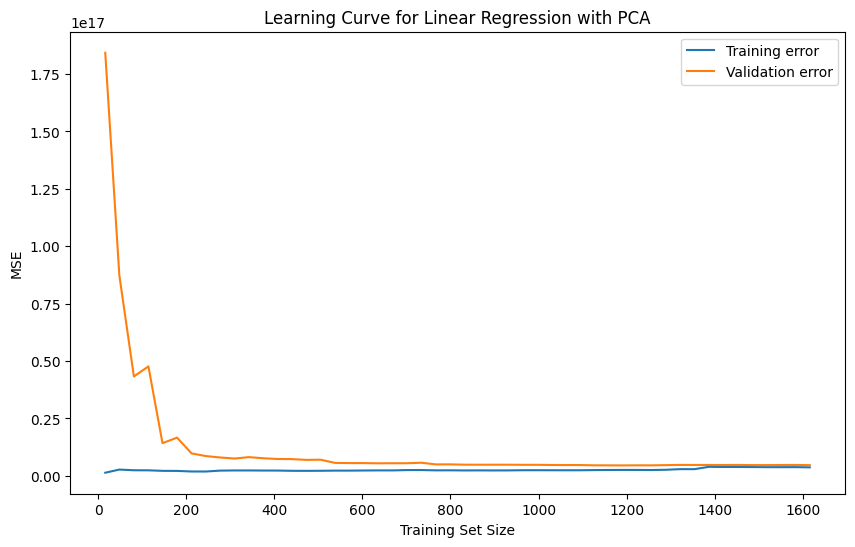

In [ ]:
# Generate learning curves using the entire pipeline as the estimator
train_sizes, train_scores, validation_scores = learning_curve(
    pipe, X_train, y_train, cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate the mean of the training and validation scores at each training set size
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve for Linear Regression with PCA')
plt.legend()
plt.show()

The learning curve shows how well our model learns from the data, using Mean Squared Error (MSE) for both training and validation sets across different amounts of training data.

- **Training Error (Blue Line)**: Stays low and consistent, showing the model fits the training data well right from the start. This indicates minimal error from bias.
- **Validation Error (Orange Line)**: Begins high when data is scarce, a common issue as models struggle with limited information. However, as we add more data, this error drops significantly. This sharp improvement suggests learning more data helps the model overcome initial overfitting.
- **Error Convergence**: Eventually, validation error levels off and gets closer to the training error, indicating the model generalizes well with enough data.
- **Stable Model Performance**: There's no late increase in validation error, showing the model keeps its performance even with lots of data.
- **High MSE Values**: Despite improvements, the MSE values are very high (up to `10^21`), hinting at large-scale predictions where even small differences lead to big squared errors.

In conclusion, our Linear Regression model with PCA is learning effectively, showing good fit without overfitting as training data increases.

Next I am going to apply a more complex model, such as the Random Forest Regression.

###Random Forest Regression

In [ ]:
# Define the pipeline
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training data and the test data using the pipeline
train_predictions = pipe.predict(X_train)
val_predictions = pipe.predict(X_val)
test_predictions = pipe.predict(X_test)

# Calculate the performance metrics on the test and validation data
mse_val = mean_squared_error(y_val, val_predictions)
r2_val = r2_score(y_val, val_predictions)

mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f"Mean Squared Error on Validation Set: {mse_val}")
print(f"R^2 Score on Validation Set: {r2_val}")

print(f"\nMean Squared Error on Test Set: {mse_test}")
print(f"R^2 Score on Test Set: {r2_test}")

Mean Squared Error on Validation Set: 1082466536833980.0
R^2 Score on Validation Set: 0.9912391499694568

Mean Squared Error on Test Set: 3814782777639964.5
R^2 Score on Test Set: 0.9890719280932262


Validation Set MSE is pretty high, meaning there's a big average difference between what our model predicts and the actual numbers.
The R² Score at about 0.991 (99.1%) shows our model can explain most of the variance in our data, which is great.

The Test Set MSE is even higher here than on the validation set, hinting our model might not do as well with new, unseen data.
The R² Score is still high at 0.989 (98.9%), indicating the model does a good job explaining the variance in the test data too.

Even though our R² scores are very good, showing our model does a fantastic job overall, the high MSE values are a bit of a red flag. This could be due to:
- The nature of our target variable (maybe it just varies a lot).
- A few big mistakes (outliers) skewing the average error.

Overall, our model's R² says it's doing an excellent job catching the patterns in the data. But, the MSE tells us to double-check for big errors or overfitting and make sure those great R² scores really mean we're on the right track.


**Visualisation 1**

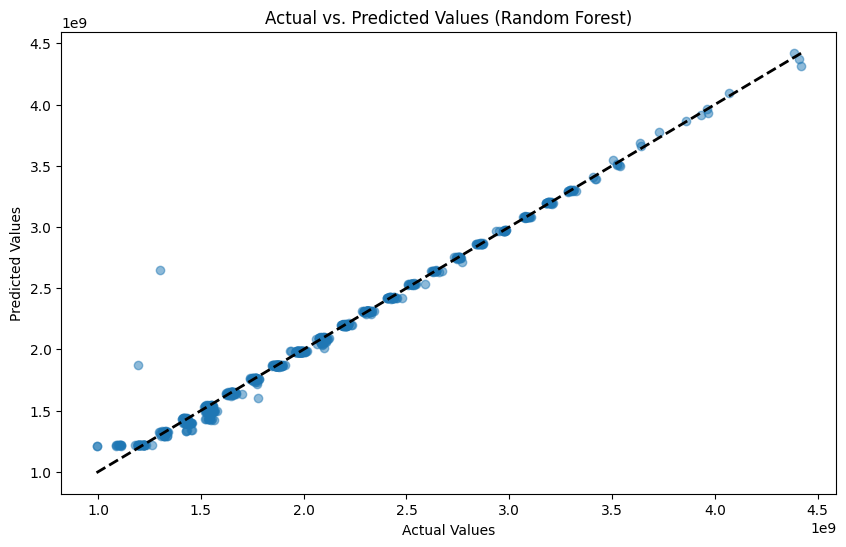

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)  # Use test_predictions from the pipeline
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.show()

Most predictions lie near the diagonal line on our scatter plot, showing they're close to actual values — a sign of good model performance. However, some predictions don't line up perfectly with the diagonal, hinting at minor inaccuracies.

Both plot axes show a range up to `1e9`, indicating we're dealing with big numbers. Small visual deviations could mean large actual differences because of this scale.

With an R2 of 0.989, our model captures most data variance, echoing the visual evidence of accurate predictions.

The visuals and R2 suggest our model does a great job predicting unseen data, despite the large numbers and potential outliers it contends with.

**Visualisation 2**

In [ ]:
# Define the pipeline with a Random Forest Regressor
pipe = Pipeline(steps=[('scaler', StandardScaler()),('rf', RandomForestRegressor(n_estimators=100, random_state=42))])

# Generate learning curves using the pipeline
train_sizes, train_scores, validation_scores = learning_curve(
    pipe, X_train, y_train, cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate the mean and standard deviation of the training and validation scores at each training set size
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve for Random Forest Regressor')
plt.legend()
plt.show()

KeyboardInterrupt: 

At small training sizes, the error is pretty high. This likely happens because the Random Forest model needs more data to grasp the complex patterns in the data. As we add more training data, both training and validation errors drop quickly. This shows the model really benefits from more data.

The training and validation errors come closer together with more data, hinting that overfitting isn't a major issue here. Random Forests tend to handle overfitting well, especially with ample data.
After reaching a certain amount of data, errors level off, suggesting extra data won't much improve the model's performance on new, unseen data.

Despite improvements, the error scale (up to `1e16`) remains large, implying significant prediction errors may still exist.
These could stem from data noise, not scaling features properly, or the model not fully capturing data complexity.
The initial high error with small data sizes could show that Random Forest has a higher learning capacity than simpler models like linear regression.

The learning curve shows the Random Forest model learns well with more data.


### Random Forest Regression with PCA

In [ ]:
# Define the pipeline with PCA and Random Forest Regressor
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # PCA with 95% variance retained
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training data and the test data using the pipeline
train_predictions = pipe.predict(X_train)
val_predictions = pipe.predict(X_val)
test_predictions = pipe.predict(X_test)

# Calculate the performance metrics on the test and validation data
mse_val = mean_squared_error(y_val, val_predictions)
r2_val = r2_score(y_val, val_predictions)

mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f"Mean Squared Error on Validation Set: {mse_val}")
print(f"R^2 Score on Validation Set: {r2_val}")

print(f"\nMean Squared Error on Test Set: {mse_test}")
print(f"R^2 Score on Test Set: {r2_test}")

Mean Squared Error on Validation Set: 9.996926012650528e+16
R^2 Score on Validation Set: 0.1909073714239038

Mean Squared Error on Test Set: 1.0784257550667707e+17
R^2 Score on Test Set: 0.6910672275610548


The test set shows a large MSE, meaning there's a big gap on average between what the model predicts and the actual numbers. Since MSE squares the errors, just a few big mistakes can make this metric jump up.

The R² Score tells us the model can explain about 70% of the variance in our target variable based on its features. An R² of 0.7 is pretty good, indicating the model fits our data well overall.

The big MSE might come from outliers. These are unusual or extreme values that the model handles poorly, pumping up the MSE. But, these don't affect R² as much, so our model still seems to fit well in general.

It's also possible the model does great for most data but drops the ball on a few points, skewing the error distribution.

If our target variable covers a huge range or isn't scaled right, that could blow up the MSE too. This is something to check if the MSE feels out of proportion.

**Visualisation 1**

In [ ]:
# Assuming `y_test` are your actual values and `test_predictions` are made by your pipeline model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)  # Use test_predictions from the pipeline
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest with PCA)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.show()

Looking at our plot, most data points stick close to the dashed line that shows where perfect predictions should land. This means our model's guesses are mostly on target.

Lots of points hugging the diagonal line tell us our model is doing a good job predicting a wide range of values. A few points stray from this line, pointing out times the model misses the mark. Checking out why could help us make the model even better.

While the plot shows many predictions are spot-on or close, we can't see exactly how many are almost perfect versus just near.

Even though the R² score was pretty solid (around 70%), suggesting our model understands the data well, a high MSE hinted at some big prediction errors here and there. This plot backs that up, showing a general trend but with some notable misses.

Overall, the plot paints a picture of a model that works well for a lot of predictions but also points out a few spots, especially those outliers and any negatives, where there's room for improvement.

**Visualisation 2**

In [ ]:
# Define the pipeline with a Random Forest Regressor
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Generate learning curves using the pipeline
train_sizes, train_scores, validation_scores = learning_curve(
    pipe, X_train, y_train, cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate the mean and standard deviation of the training and validation scores at each training set size
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve for Random Forest Regressor with PCA')
plt.legend()
plt.show()

In the beginning, when there's hardly any data to learn from, both training and validation errors are sky-high. That's expected, as the model struggles to grasp the overall pattern from just a few examples. But as we feed it more data, we see a quick drop in errors. This improvement shows the model is eager to learn and does so effectively with more information.

Eventually, the errors from training and validation meet, suggesting our model strikes a good balance. It's not overfitting (learning the training data too closely) nor underfitting (missing the broader trends). The errors level off after a certain point, hinting that piling on more data won't really help the model get better. This plateau might mean the model's learned as much as it can with what it's been given.

Still, the errors stay high, indicating our predictions often miss the mark. While using PCA with our Random Forest model seemed like a good idea to simplify things, it might've cut out valuable info. Random Forests usually handle complex data well on their own, so maybe PCA wasn't needed.

Overall, the learning curve shows our model does a decent job generalizing but still makes significant mistakes on average. It's worth a closer look at the data and maybe a rethink on our approach to improve accuracy.

## Evaluations

### Linear Regression Models

Applying PCA seems to greatly improve the performance of the linear regression model based on all three metrics. The original model without PCA is performing poorly, while the model with PCA appears to be a better fit for the data, albeit still with room for improvement given the still-large MSE. The high MSE still suggests potential issues, such as outliers or the need for further feature engineering, that might need to be addressed to improve model performance.

### Random Forest Regression Models

When we look at how PCA impacts our Random Forest Regression model, the differences are clear:

- Without PCA, MSE is way lower. Adding PCA increases MSE significantly, making errors about 100 times bigger.
- The same goes in the test set; PCA leads to much bigger MSEs.
- Without PCA, R² scores are almost perfect.
- It looks like PCA might be throwing out valuable info that helps the Random Forest make good predictions.
- Without PCA, our model seems to catch on to the data's patterns pretty well.

In summary, skipping PCA seems to be the way to go for our Random Forest model. PCA's dimension reduction doesn't help and might even be stripping away details the model needs to make accurate predictions.

## Conclusion

Random Forest tends to handle complex, non-linear relationships better than Linear Regression and is robust to outliers.
Linear Regression assumes a linear relationship between features and the target variable, and it is sensitive to outliers.

The Linear Regression without PCA has extremely poor performance, while with PCA, it shows a reasonable R² but still a high MSE, indicating potential outliers or scale issues.

Random Forest without PCA shows near-perfect performance metrics on both validation and test sets, indicating a very good fit to the data.
Random Forest with PCA shows a significant drop in performance, suggesting that the dimensionality reduction might not be beneficial for this ensemble method.


PCA seems to improve the performance of Linear Regression, while PCA does not appear to benefit the Random Forest model, which generally performs well with high-dimensional data and may lose information after PCA.

Random Forest models (without PCA) outperform Linear Regression models in terms of both MSE and R² scores provided.

In conclusion, based on the results, Random Forest Regression without PCA is the superior model, demonstrating strong predictive power and a good fit to the data. Linear Regression seems to struggle with this particular dataset unless PCA is applied, which improves its performance but not to the level of the Random Forest Regression model.